<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/Assignment_30(01_07_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSE-221710301019-PRASAD REDDY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read the data
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
# Drop CASNUM
df.drop(["CASENUM"],axis=1,inplace=True)
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [4]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ATTORNEY,1340.0,0.488806,0.500061,0.0,0.0,0.0000,1.0000,1.000
CLMSEX,1328.0,0.558735,0.496725,0.0,0.0,1.0000,1.0000,1.000
CLMINSUR,1299.0,0.907621,0.289671,0.0,1.0,1.0000,1.0000,1.000
SEATBELT,1292.0,0.017028,0.129425,0.0,0.0,0.0000,0.0000,1.000
CLMAGE,1151.0,28.414422,20.304451,0.0,9.0,30.0000,43.0000,95.000
LOSS,1340.0,3.806307,10.636903,0.0,0.4,1.0695,3.7815,173.604


In [5]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

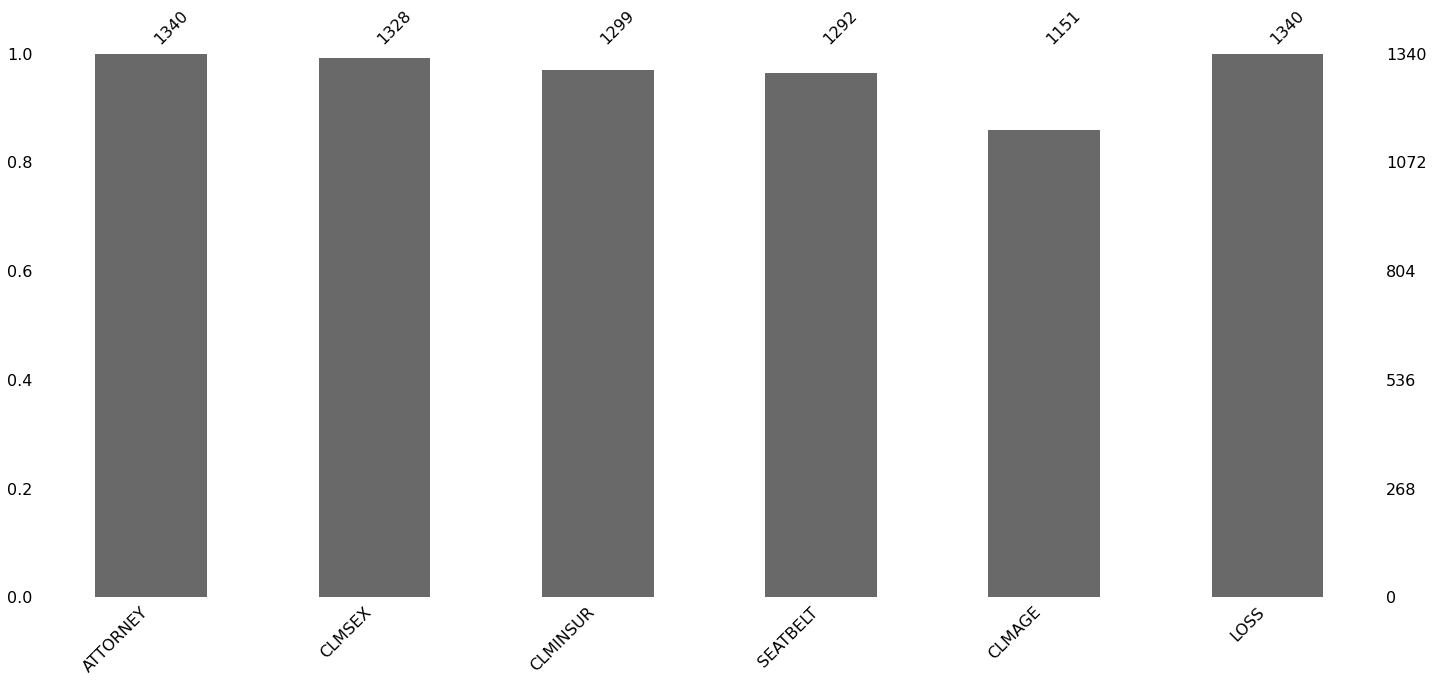

In [6]:
import missingno as ms
ms.bar(df)

In [7]:
# User defined function for imputing null values with mode
def fill(col):
  col.fillna(col.value_counts().index[0],inplace=True)
  return col
df.apply(lambda col:fill(col))
df.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

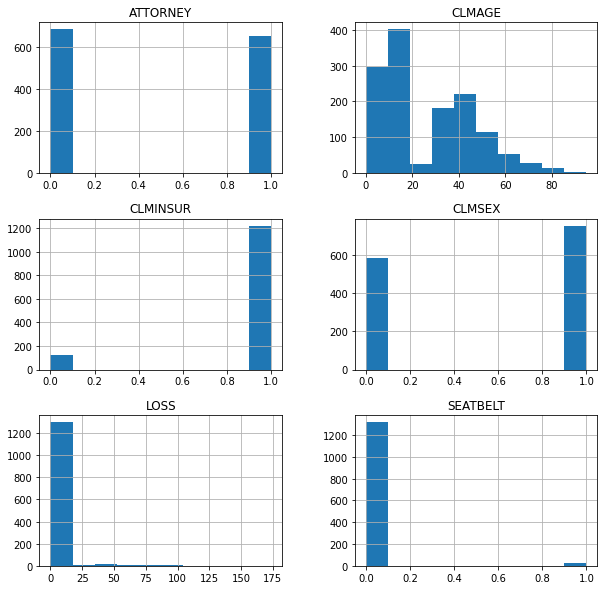

In [8]:
df.hist(figsize=(10,10))
plt.show()

In [9]:
# Spllitting I/O
X = df.iloc[:,1:]
y = df.ATTORNEY

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(938, 5)
(402, 5)
(938,)
(402,)


- **Apply the KNN Algorithm on the dataset .**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score = []
for k in range(1,21):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,y_train)
  y_pred_test = knn_model.predict(X_test)
  score.append(accuracy_score(y_test,y_pred_test))
  print(accuracy_score(y_test,y_pred_test))

0.6019900497512438
0.6169154228855721
0.6567164179104478
0.6616915422885572
0.6791044776119403
0.6766169154228856
0.6840796019900498
0.7064676616915423
0.681592039800995
0.7014925373134329
0.6965174129353234
0.7064676616915423
0.7014925373134329
0.7089552238805971
0.7014925373134329
0.7164179104477612
0.6990049751243781
0.7014925373134329
0.6990049751243781
0.7039800995024875


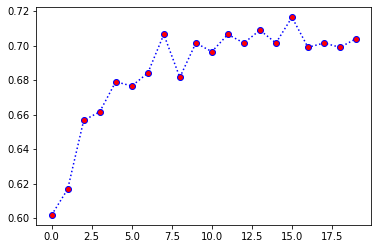

In [13]:
plt.plot(score,marker="o",markerfacecolor="r",color="b",linestyle="dotted")

- Optimum k value is 16

In [14]:
final_model = KNeighborsClassifier(n_neighbors=16,metric="euclidean")
final_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [15]:
y_train_pred = final_model.predict(X_train)
y_test_pred=final_model.predict(X_test)

2. Compute all the classification metrics

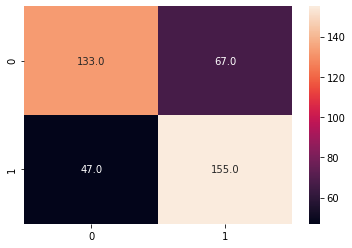

In [16]:
#confusion matrix before scaling
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt="0.1f")
plt.show()

In [17]:

print('\non TESTING DATA:\n')
print(classification_report(y_test,y_test_pred))


on TESTING DATA:

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       200
           1       0.70      0.77      0.73       202

    accuracy                           0.72       402
   macro avg       0.72      0.72      0.72       402
weighted avg       0.72      0.72      0.72       402



In [18]:
y_test_prob = final_model.predict_proba(X_test)
y_test_prob = pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,0.0625,0.9375
1,0.1250,0.8750
2,0.4375,0.5625
3,0.4375,0.5625
4,0.5625,0.4375
...,...,...
397,0.7500,0.2500
398,0.7500,0.2500
399,0.8125,0.1875
400,0.6875,0.3125


In [19]:
y_test

559     1
1089    1
1021    1
460     1
802     0
       ..
323     1
929     1
134     0
1276    0
876     1
Name: ATTORNEY, Length: 402, dtype: int64

3. Plot the ROC Curve for the model and find the AUC

In [30]:
# Roc curve
#TPR , FPR , THRESHOLD
from sklearn.metrics import roc_auc_score,roc_curve
hiring_prob = final_model.predict_proba(X_test)[:,1]
tpr , fpr , threshold = roc_curve(y_test,hiring_prob)

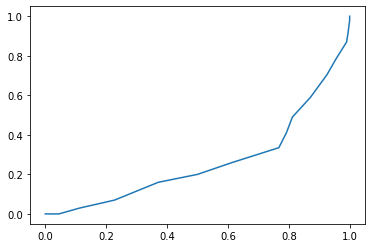

In [31]:
plt.plot(fpr,tpr)

In [32]:
roc_auc_score(y_test, hiring_prob)

0.7363366336633663

4. Compare the AUC of KNN Model with Logistic Regression Model and find which Model has higher AUC

In [33]:
# Build the classifier on training data
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
final_model1 = reg.fit(X_train,y_train) # I/p and o/p will be passed to the fit method
final_model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_test_pred1 = reg.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_test_pred1)
conf

array([[120,  80],
       [ 42, 160]])

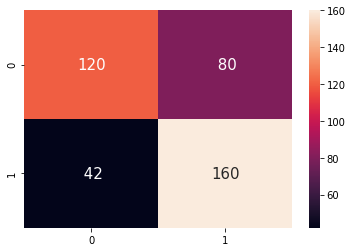

In [36]:
sns.heatmap(confusion_matrix(y_test,y_test_pred1), annot=True, fmt='3.0f',annot_kws={'size':'15'})

In [37]:
# Classification Report for Test Data
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66       200
           1       0.67      0.79      0.72       202

    accuracy                           0.70       402
   macro avg       0.70      0.70      0.69       402
weighted avg       0.70      0.70      0.69       402



In [38]:
y_test_prob1 = final_model1.predict_proba(X_test)
y_test_prob1 = pd.DataFrame(y_test_prob1)
y_test_prob1

,0,1
0,0.315920,0.684080
1,0.331685,0.668315
2,0.430725,0.569275
3,0.380719,0.619281
4,0.573735,0.426265
...,...,...
397,0.695381,0.304619
398,0.736382,0.263618
399,0.621953,0.378047
400,0.533374,0.466626


In [39]:
y_test

559     1
1089    1
1021    1
460     1
802     0
       ..
323     1
929     1
134     0
1276    0
876     1
Name: ATTORNEY, Length: 402, dtype: int64

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
hiring_prob1 = final_model1.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, hiring_prob1)

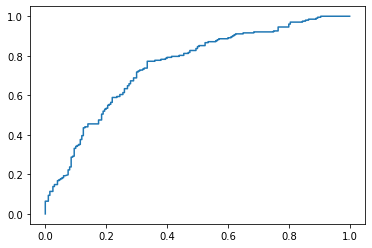

In [41]:
plt.plot(fpr1, tpr1)

In [42]:
roc_auc_score(y_test, hiring_prob1)

0.7489356435643564

<h3>LogisticRegression model has higher AUC value